In [71]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [72]:
with open("data.txt") as f:
    data = f.read()
    
data = data.lower()

split = data.split("\n")

ks = split.index("key")+1
ke = split.index("format:")-1

key = {}
keyr = {}

for i in range(ks, ke):
    kv = split[i].lower().split(" - ")
    key[kv[0]] = kv[1]
    keyr[kv[1]] = kv[0]

print(keyr)

{'bench press': 'bp', 'leg press': 'lp', 'leg press calf': 'lpc', 'inclined bench press': 'ibp', 'seated curl': 'sc', 'seated bar curl ': 'sbc', 'bar curl': 'bc', 'lean forward curl': 'lfc', 'triceps standing': 'ts', 'seated shoulder press': 'ssp', 'seated pectoral fly': 'spf', 'laying pectoral fly ': 'lpf', 'assisted pull up overhand': 'apuo', 'squat': 's', 'inclined sit up': 'isu', 'leg curl': 'lc', 'leg extension': 'le', 'leg lift abdominal': 'lla', 'laying tricep extension (bar)': 'lte', 'inclined bench press barbell ': 'ibb', 'rear deltoid': 'rd', 'row cardio, time in minutes': 'rc', 'row': 'r', 'sitting abdominal': 'sab', 'calf': 'c', 'back extension': 'be'}


In [76]:
# graph exercise over time

def total_weight(exercise_name):
    ekey = keyr[exercise_name] + " " # add white space

    # exercise data
    edata = []

    # data start index
    ds = split.index("new line")+2
    for i in range(ds, len(split)):
        if split[i].find(ekey) == 0:
            d = split[i].split(" ")
            weight = float(d[1]) * float(d[2])
            edata.append(weight)
    
    return edata


print(total_weight("bench press"))

[690.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 1000.0, 1000.0, 1000.0]


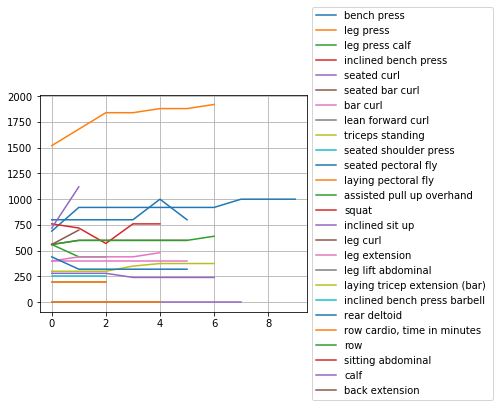

In [77]:
for k in keyr:
    fig = plt.plot(total_weight(k), label=k)
    
ax = plt.subplot(111)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()